In [183]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
#read data
data = pd.read_csv('ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [185]:
#summarize the data
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<function matplotlib.pyplot.show(*args, **kw)>

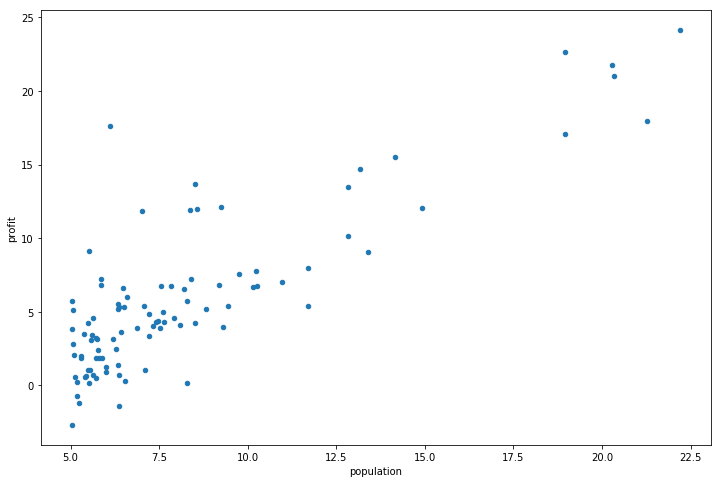

In [186]:
#show the trade of the data
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))
plt.show

In [187]:
#define a function for cost function
def computeCost(X , y, theta):
    inner = np.power(((X * theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [188]:
#insert the column of the intercept
data.insert(0,'Ones',1)
data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [160]:
? data.loc

In [190]:
X = data.loc[:,['Ones','population']]
y = data.loc[:,['profit']]
                

In [191]:
X.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [192]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [193]:
#transform X and y into numpy matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [194]:
theta

matrix([[0, 0]])

In [195]:
#check the dimension of all variables
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [196]:
#calculate the value of cost function
computeCost(X , y, theta)

32.072733877455676

In [197]:
#define the gradient_descent function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    history_cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X* theta.T)-y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j]-((alpha/len(X)) *np.sum(term))
        theta = temp
        history_cost[i] = computeCost(X, y, theta)
    return theta, history_cost

In [198]:
alpha = 0.01
iters = 1000

In [199]:
g, history_cost = gradientDescent(X,y, theta, alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [200]:
computeCost(X , y, g)

4.515955503078912

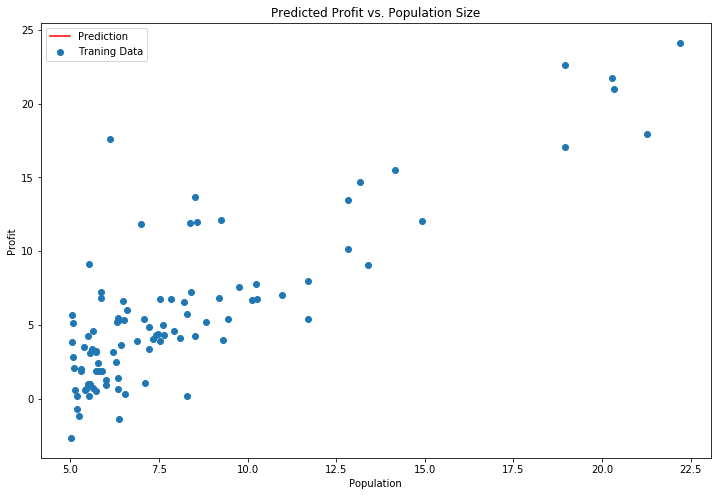

In [172]:
x = np.linspace(data.population.min(),data.population.max(),100)
f = g[0,0] +(g[0,1]*x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population,data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

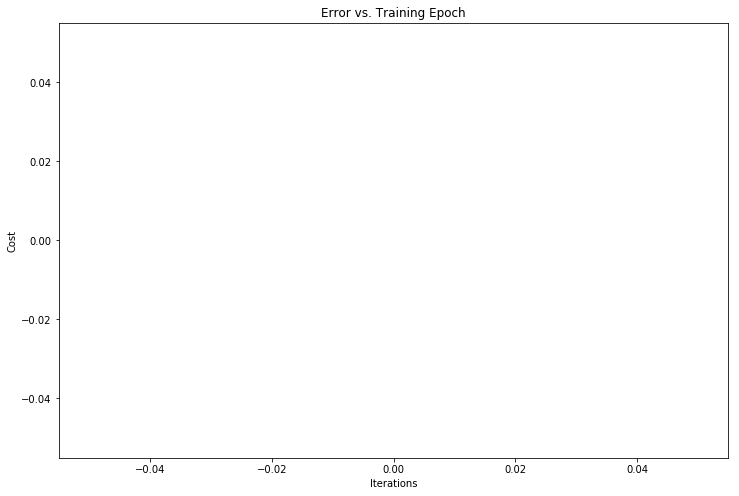

In [173]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), history_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [174]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [175]:
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [176]:
#add column of intercept
data2.insert(0,'Ones',1)# BE ATTENTION TO Ones no ones

X2 = data2.loc[:,['Ones','Size','Bedrooms']]
y2 = data2.loc[:,['Price']]

X2.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [177]:
y2.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [178]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

#perform linear regression on the data set
g2, history_cost2 = gradientDescent(X2, y2,theta2,alpha,iters)

#the cost 
computeCost(X2, y2,g2)

0.13070336960771892

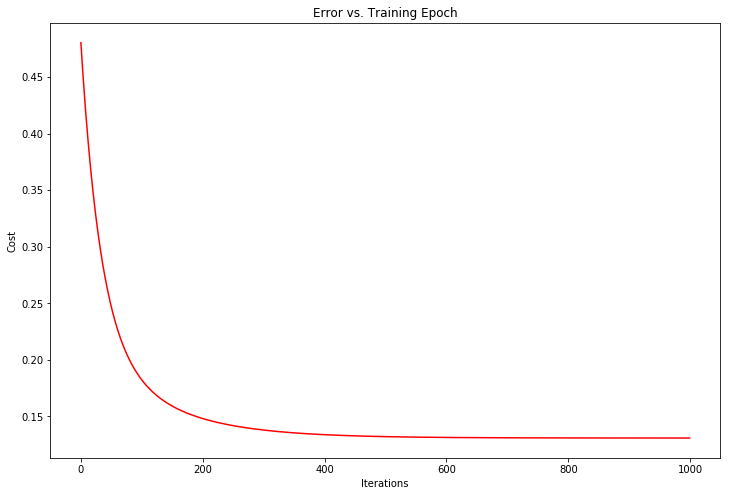

In [179]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), history_cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()


In [201]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

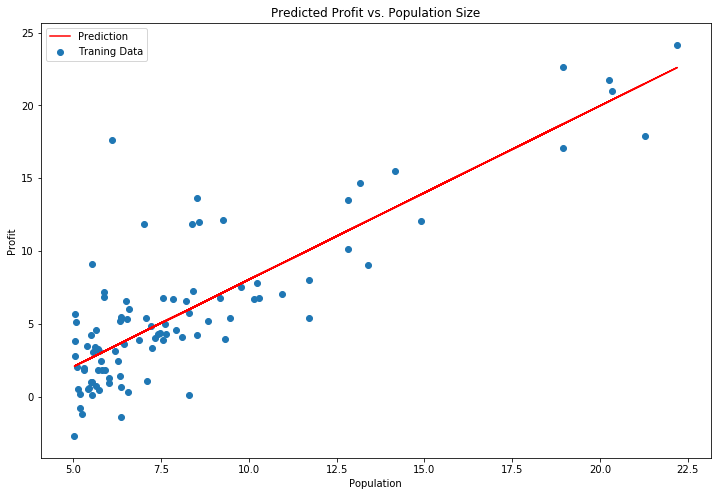

In [202]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [203]:
def normalEqn(X, y):
    # linalg模块包含线性代数的函数，inv()函数计算逆矩阵
    theta = np.linalg.inv(X.T@X)@X.T@y    #X.T@X等价于X.T.dot(X)
    return theta

In [204]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])